In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import
st_law_bars = pd.read_csv("output_data/e_coast_laws_by_state.csv")

In [3]:
st_law_bars_wtr = st_law_bars[~st_law_bars['Main Interest Type'].str.contains('AIR', na=False)]
st_law_bars_wtr = st_law_bars[~st_law_bars['Supplemental Interest Type'].str.contains('AIR|REMEDIATION|FUNDING', na=False)]
st_law_bars_wtr.head()

,Unnamed: 0,State,Main Interest Type,Supplemental Interest Type,Start of Relief,Create_dt of Relief
0,6,al,ICIS-NPDES NON-MAJOR,ENFORCEMENT/COMPLIANCE ACTIVITY,2014.0,05-JUN-2018 00:00:00
1,7,al,STORM WATER INDUSTRIAL,ENFORCEMENT/COMPLIANCE ACTIVITY,2014.0,05-JUN-2018 00:00:00
2,135,al,STORM WATER INDUSTRIAL,ENFORCEMENT/COMPLIANCE ACTIVITY,2016.0,04-OCT-2017 00:00:00
3,138,al,ICIS-NPDES NON-MAJOR,ENFORCEMENT/COMPLIANCE ACTIVITY,2016.0,04-OCT-2017 00:00:00
4,141,al,TRI REPORTER,ENFORCEMENT/COMPLIANCE ACTIVITY,2015.0,01-SEP-2017 13:52:55


In [4]:
df = st_law_bars_wtr
df['Start of Relief'].value_counts()

2014.0    29689
2015.0    24103
2017.0    14594
2016.0    12068
2018.0     7003
Name: Start of Relief, dtype: int64

In [5]:
df.State.unique()

array(['al', 'ct', 'de', 'ga', 'la', 'ma', 'md', 'me', 'ms', 'nc', 'nh',
       'nj', 'ny', 'ri', 'sc', 'va'], dtype=object)

In [6]:
df['Main Interest Type'].value_counts()

STATE MASTER                                  70085
ICIS-NPDES NON-MAJOR                           4769
FORMAL ENFORCEMENT ACTION                      3870
ICIS-NPDES UNPERMITTED                         2110
ENFORCEMENT/COMPLIANCE ACTIVITY                1682
STORM WATER INDUSTRIAL                         1089
STORM WATER CONSTRUCTION                        900
LQG                                             528
SQG                                             338
TRI REPORTER                                    293
CONCENTRATED ANIMAL FEEDING OPERATION           256
CESQG                                           238
PHASE II MS4                                    202
UNSPECIFIED UNIVERSE                            197
RMP REPORTER                                    172
COMMUNITY WATER SYSTEM                          141
ICIS-NPDES MINOR                                 82
AIR MAJOR                                        66
TRANSIENT NON-COMMUNITY WATER SYSTEM             48
TSD         

In [7]:
notAnObject = st_law_bars_wtr.astype(str)
notAnObject.dtypes

Unnamed: 0                    object
State                         object
Main Interest Type            object
Supplemental Interest Type    object
Start of Relief               object
Create_dt of Relief           object
dtype: object

In [8]:
waterGrab = notAnObject['Main Interest Type'].str.contains("WATER", case = True, regex = True)
print(waterGrab)

0        False
1         True
2         True
3        False
4        False
         ...  
87452    False
87453    False
87454    False
87455    False
87456    False
Name: Main Interest Type, Length: 87457, dtype: bool


In [9]:
df = notAnObject[waterGrab]
print(df)

      Unnamed: 0 State                    Main Interest Type  \
1              7    al                STORM WATER INDUSTRIAL   
2            135    al                STORM WATER INDUSTRIAL   
12           259    al                STORM WATER INDUSTRIAL   
20           398    al                STORM WATER INDUSTRIAL   
22           402    al                STORM WATER INDUSTRIAL   
...          ...   ...                                   ...   
86665      72984    sc                STORM WATER INDUSTRIAL   
86668      72987    sc                STORM WATER INDUSTRIAL   
86843       7867    va                COMMUNITY WATER SYSTEM   
86957      11542    va  TRANSIENT NON-COMMUNITY WATER SYSTEM   
86958      11544    va  TRANSIENT NON-COMMUNITY WATER SYSTEM   

            Supplemental Interest Type Start of Relief   Create_dt of Relief  
1      ENFORCEMENT/COMPLIANCE ACTIVITY          2014.0  05-JUN-2018 00:00:00  
2      ENFORCEMENT/COMPLIANCE ACTIVITY          2016.0  04-OCT-2017 00:00

In [10]:
df['Main Interest Type'].value_counts()

STORM WATER INDUSTRIAL                      1089
STORM WATER CONSTRUCTION                     900
COMMUNITY WATER SYSTEM                       141
TRANSIENT NON-COMMUNITY WATER SYSTEM          48
NON-TRANSIENT NON-COMMUNITY WATER SYSTEM      13
Name: Main Interest Type, dtype: int64

In [11]:
x = df[['Start of Relief', 'State', 'Main Interest Type']]

In [12]:
def time_change(df):

    sorted_states = ['al', 'ct', 'de', 'ga', 
                    'la', 'ma', 'md', 'me', 
                    'ms', 'nc', 'nh', 'nj', 
                    'ny', 'ri', 'sc', 'va']
    
    # Get df ready to become a percentage stacked bar chart
    percent = df.groupby(['Start of Relief', 'State'])['Start of Relief'].count().unstack('State')/16*100
    
    # Sort df by income groups
    percent.columns = pd.CategoricalIndex(percent.columns.values, 
                                     ordered=True, 
                                     categories=sorted_states)
    percent = percent.sort_index(axis=1)
    
    # Plot
    ax = percent.plot(kind='bar', stacked=True, 
                 title='Annual State Interest', 
                 figsize=(10,10), 
                 rot=0)
    
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tick_params(left=False)
    plt.legend(loc='upper right')
    plt.axhline(20, color='white', alpha=0.25)
    plt.axhline(40, color='white', alpha=0.25)
    plt.axhline(60, color='white', alpha=0.25)
    plt.axhline(80, color='white', alpha=0.25)
    sns.despine(top=True, right=True)
    
    plt.show()

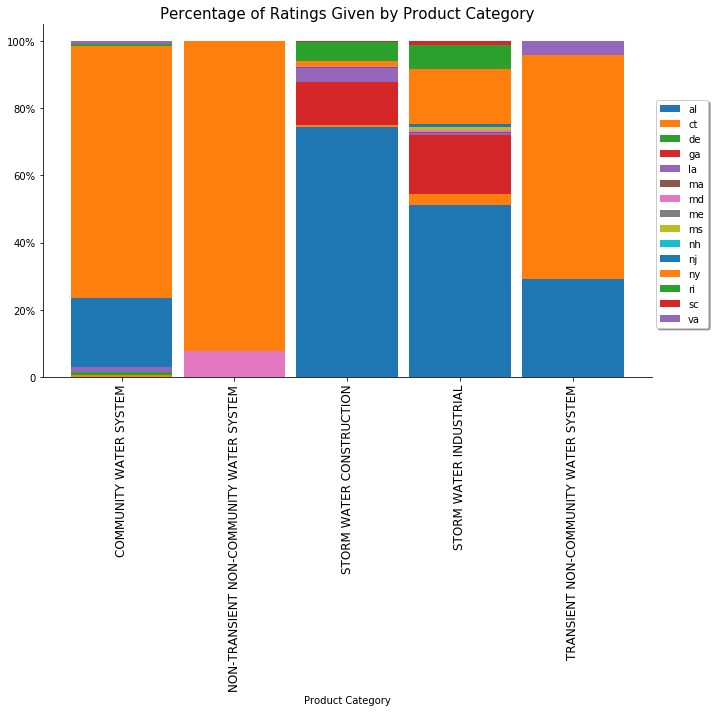

In [13]:
# Group dataset by State and Main Interest Type
grouped = x.groupby(['State', 'Main Interest Type']).count().reset_index()

# Pivot dataset
g_pivot = grouped.pivot(index='Main Interest Type', columns='State', values='Start of Relief')
g_pivot = g_pivot.fillna(0)


plt.figure(figsize=(10,10))

# Plot breakdown
ax2 = plt.subplot(1,1,1)
g_pivot.div(g_pivot.sum(axis=1), axis=0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_title('Percentage of Ratings Given by Product Category', fontsize=15)
ax2.set_xlabel('Product Category')
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.legend(loc='upper center', bbox_to_anchor=(1.05, 0.8), shadow=True, ncol=1)
plt.xticks(fontsize=12)

sns.despine(top=True, right=True)
plt.tight_layout()


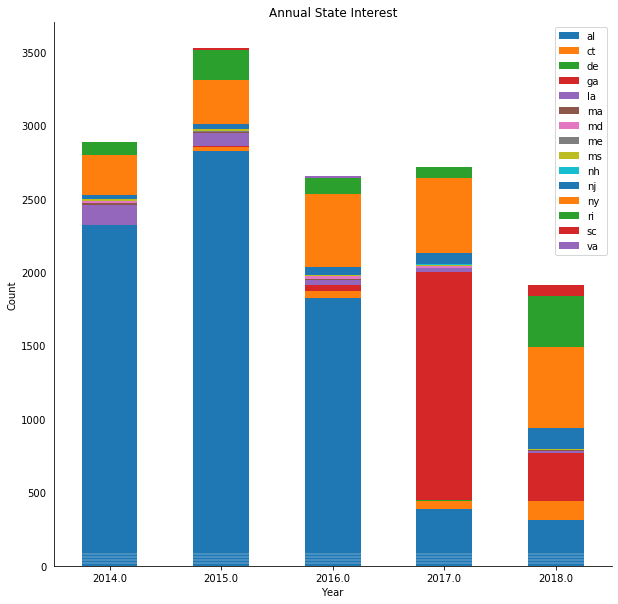

<Figure size 432x288 with 0 Axes>

In [14]:
time_change(x)
plt.savefig("output_data/State_Interest_perYear.png")